In [1]:
# Лабораторная работа 6
# Библиотеки 
import numpy as np
import matplotlib.pyplot as plt

# Инициализация параметров
input_dim = 2
output_dim = 2
learning_rate = 0.5
epochs = 100



Epoch 1/100, Квадрадичная ошибка: 2.9909
Epoch 2/100, Квадрадичная ошибка: 3.3607
Epoch 3/100, Квадрадичная ошибка: 2.9632
Epoch 4/100, Квадрадичная ошибка: 3.3484
Epoch 5/100, Квадрадичная ошибка: 3.0694
Epoch 6/100, Квадрадичная ошибка: 3.4192
Epoch 7/100, Квадрадичная ошибка: 2.9952
Epoch 8/100, Квадрадичная ошибка: 3.5763
Epoch 9/100, Квадрадичная ошибка: 3.1790
Epoch 10/100, Квадрадичная ошибка: 3.3258
Epoch 11/100, Квадрадичная ошибка: 3.0890
Epoch 12/100, Квадрадичная ошибка: 3.0768
Epoch 13/100, Квадрадичная ошибка: 3.3875
Epoch 14/100, Квадрадичная ошибка: 3.0271
Epoch 15/100, Квадрадичная ошибка: 3.3887
Epoch 16/100, Квадрадичная ошибка: 3.1791
Epoch 17/100, Квадрадичная ошибка: 3.3660
Epoch 18/100, Квадрадичная ошибка: 3.0656
Epoch 19/100, Квадрадичная ошибка: 3.7883
Epoch 20/100, Квадрадичная ошибка: 3.0106
Epoch 21/100, Квадрадичная ошибка: 3.4048
Epoch 22/100, Квадрадичная ошибка: 3.4782
Epoch 23/100, Квадрадичная ошибка: 3.5466
Epoch 24/100, Квадрадичная ошибка: 3.5645
E

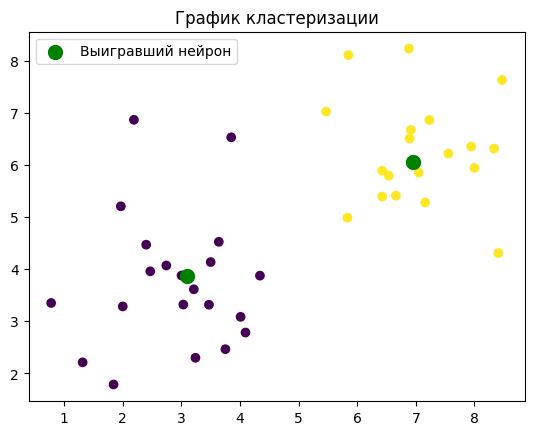

In [2]:
# Генерация случайных точек вокруг двух центров кластеров
np.random.seed(12)
center1 = np.array([3, 4])
center2 = np.array([7, 6])
data_cluster1 = center1 + np.random.randn(20, input_dim)
data_cluster2 = center2 + np.random.randn(20, input_dim)
data = np.concatenate([data_cluster1, data_cluster2])

# Инициализация весов сети
weights = np.random.rand(output_dim, input_dim)

# Обучение сети
for epoch in range(epochs):
    np.random.shuffle(data)
    for point in data:
        # Нахождение выигравшего нейрона (ближайшего к точке)
        winner_neuron = np.argmin(np.linalg.norm(weights - point, axis=1))  
        weights[winner_neuron] += learning_rate * (point - weights[winner_neuron])
    error = np.mean(np.linalg.norm(weights - data[:, np.newaxis], axis=2))
    print(f'Epoch {epoch + 1}/{epochs}, Квадрадичная ошибка: {error:.4f}')
    
# Визуализация конечного состояния после обучения
plt.scatter(data[:, 0], data[:, 1], c=np.argmin(np.linalg.norm(weights - data[:, np.newaxis], axis=2), axis=1))
plt.scatter(weights[:, 0], weights[:, 1], marker='o', s=100, c='green', label='Выигравший нейрон')
plt.title(f'График кластеризации')
plt.legend()
plt.show()


In [3]:
# Оценка точности
predicted_clusters = np.argmin(np.linalg.norm(weights - data[:, np.newaxis], axis=2), axis=1)
true_labels = np.concatenate([np.zeros(20), np.ones(20)])
accuracy = np.mean(predicted_clusters == true_labels)
print(f'Точность кластеризации: {accuracy * 100:.2f}%')

Точность кластеризации: 52.50%
